### Black-body radiation thermometer modelling

In [2]:
%matplotlib widget
# Dependencies
import matplotlib.pyplot as plt
import numpy as np

# Settings
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150

### [Planck's Law](https://en.wikipedia.org/wiki/Planck%27s_law)

Radiance Intensity $B_\lambda(\lambda,T) = \frac{2 h c^2}{\lambda^5} \frac{1}{e^{\left( h c / \left(\lambda k_B T\right) \right)}-1}$

$\lambda =$ Wavelength

$h =$ Planck constant ($\text{J} \cdot \text{s}$)

$c =$ Lightspeed ($\text{m} \cdot \text{s}^{-1}$)

$k_B =$ Boltzmann constant ($\text{J} \cdot \text{K}$)

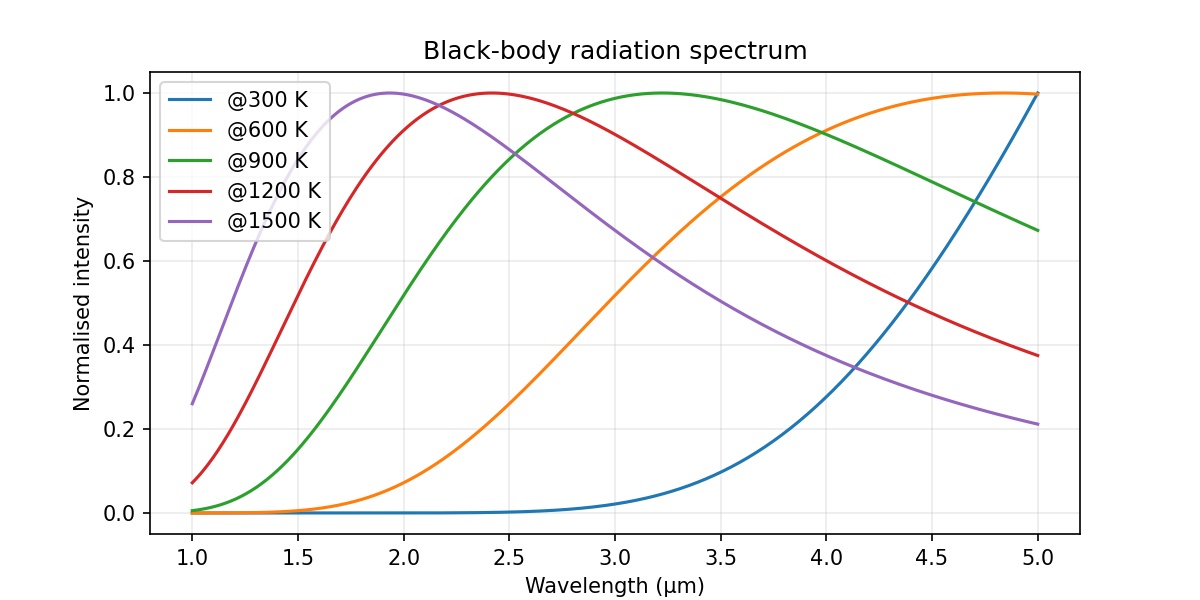

In [3]:
""" Physical Constants """
h = 6.626e-34  # Planck constant (J·s)
c = 3.0e8      # Lightspeed (m/s)
kB = 1.38e-23  # Boltzmann constant (J/K)

lambda_range = np.linspace(1e-6, 5e-6, 500)  # Wavelength: 1 µm - 5 µm
T_values = [300, 600, 900, 1200, 1500]  # Temperature values in K

""" Planck's Law """
def planck_law(lambda_range, T):
    result = (2*h*c**2 / lambda_range**5) * 1 / (np.exp(h*c/(lambda_range*kB*T)) - 1)
    return result

fig = plt.figure(figsize=(8, 4))
ax = fig.subplots()
ax.set_title("Black-body radiation spectrum")
ax.set_xlabel("Wavelength (µm)")
ax.set_ylabel("Normalised intensity")
ax.grid(linewidth=.2)

for T in T_values:
    intensity = planck_law(lambda_range, T)  # Planck's Law
    intensity /= np.max(intensity)  # Normalise
    ax.plot(lambda_range * 1e6, intensity, label=f"@{T} K")

ax.legend()
plt.show()

### Sensor Calibration via Polynomial Fitting

Polynomial Fitting $y(x) = p_0 x^n + \dots + p_n$ using numpy
```python
np.polyfit(x_data, y_data, degree) -> polynomial_coefficients
```

Evaluating the coefficients $p_0, \dots, p_n$ of a polynome
```python
np.polyval(polynomial_coefficients, x_data) -> y_data
```


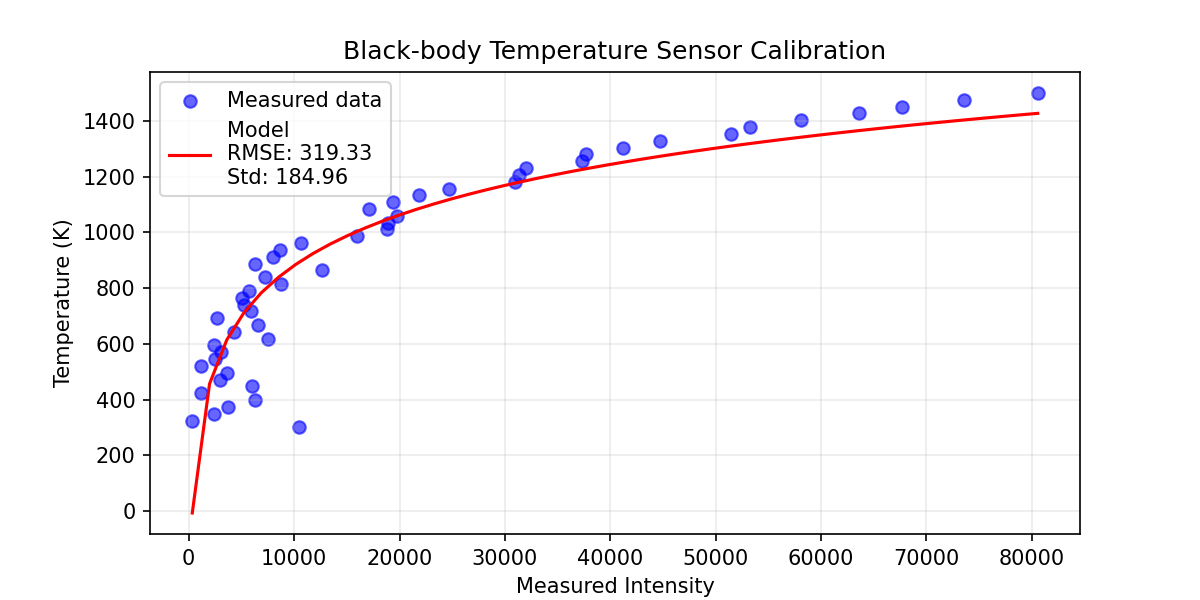

In [15]:
# Sensor data simulation
T_sim = np.linspace(300, 1500, 50)  # Simulated Temperatures
I_measured = np.array([np.trapezoid(planck_law(lambda_range, T), lambda_range) for T in T_sim])  # Signal integration
noise = np.abs(np.random.normal(0, 0.05 * np.max(I_measured), size=len(I_measured)))
I_noisy = I_measured + noise

# Sensor Calibration (Polynomial Fitting)
coeff = np.polyfit(np.log(I_noisy), T_sim, 1)
I_test = np.linspace(np.min(I_noisy), np.max(I_noisy), I_noisy.shape[0])
T_estimated = np.polyval(coeff, np.log(I_test))

mean_err = np.sqrt(np.mean(np.pow(T_sim - T_estimated, 2)))
std_dev = np.std(T_sim - T_estimated)

# Comparing data
fig = plt.figure(figsize=(8, 4))
ax = fig.subplots()
ax.scatter(I_noisy, T_sim, label="Measured data", color='b', alpha=0.6)
ax.plot(I_test, T_estimated, label=f"Model\nRMSE: {mean_err:.2f}\nStd: {std_dev:.2f}", color='r')
ax.set_xlabel("Measured Intensity")
ax.set_ylabel("Temperature (K)")
ax.set_title("Black-body Temperature Sensor Calibration")
ax.legend()
ax.grid(linewidth=.2, zorder=0)
plt.show()